In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

In [2]:
df = pd.read_excel('telcom_data.xlsx')
df.head()

Bearer Id               Start  Start ms                 End  \
0  13114483460844900352 2019-04-04 12:01:18     770.0 2019-04-25 14:35:31   
1  13114483482878900224 2019-04-09 13:04:04     235.0 2019-04-25 08:15:48   
2  13114483484080500736 2019-04-09 17:42:11       1.0 2019-04-25 11:58:13   
3  13114483485442799616 2019-04-10 00:31:25     486.0 2019-04-25 07:36:35   
4  13114483499480700928 2019-04-12 20:10:23     565.0 2019-04-25 10:40:32   

   End ms  Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0   662.0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1   606.0  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2   652.0  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3   171.0  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4   954.0  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

  Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0   9164566995485190  ...          15854611.0           2501332.0   
1            L77566A  ...          20247395.0          19111729.0   
2            D42335A  ...          19725661.0          14699576.0   
3            T21824A  ...          21388122.0          15146643.0   
4            D88865A  ...          15259380.0          18962873.0   

   Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  \
0           8198936.0           9656251.0        278082303.0   
1          18338413.0          17227132.0        608750074.0   
2          17587794.0           6163408.0        229584621.0   
3          13994646.0           1097942.0        799538153.0   
4          17124581.0            415218.0        527707248.0   

   Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  Total UL (Bytes)  \
0         14344150.0       171744450.0         8814393.0        36749741.0   
1          1170709.0       526904238.0        15055145.0        53800391.0   
2           395630.0       410692588.0         4215763.0        27883638.0   
3         10849722.0       749039933.0        12797283.0        43324218.0   
4          3529801.0       550709500.0        13910322.0        38542814.0   

   Total DL (Bytes)  
0       308879636.0  
1       653384965.0  
2       279807335.0  
3       846028530.0  
4       569138589.0  

[5 rows x 55 columns]

In [3]:
df.shape

(150001, 55)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

In [5]:
# Column Names
df.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

# Handling The Missing Values

In [6]:
# What is the % of the missing values in the dataset

def percent_missing(df):

  # calculate total number of cells in the dataframe
  totalCells = np.product(df.shape)

  #count the number of missing values per column
  missingCount = df.isnull().sum()

  #calculate the total number of missing valies
  totalMissing = missingCount.sum()

  # calculate the percentage of the missing values
  print(" Telcom Data ", round(((totalMissing/totalCells) * 100), 2), "%", "Missing Values.")

percent_missing(df)

 Telcom Data  12.49 % Missing Values.


In [7]:
# The missing values in each column
df.isnull().sum()

Bearer Id                                        0
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [8]:
# Dropping columns with more than 30% of missing values
df1 = df.drop(['Nb of sec with 6250B < Vol UL < 37500B', 'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 37500B < Vol UL',
                    'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 1250B < Vol UL < 6250B',
                   'Nb of sec with 125000B < Vol DL','HTTP UL (Bytes)','HTTP DL (Bytes)',
                   'TCP UL Retrans. Vol (Bytes)','TCP DL Retrans. Vol (Bytes)','Avg RTT UL (ms)','Avg RTT DL (ms)',
               'Last Location Name'], axis=1)
df1.shape

(150001, 42)

In [9]:
# Filling missing calues ith ffill method for columns

def fix_missing_ffill(df1, col):
  df1[col] = df1[col].fillna(method = 'ffill')
  return df1[col]

In [10]:
df1['Handset Manufacturer'] = fix_missing_ffill(df1, 'Handset Manufacturer')
df1['Handset Type'] = fix_missing_ffill(df1, 'Handset Type')
df1['Nb of sec with Vol DL < 6250B'] = fix_missing_ffill(df1, 'Nb of sec with Vol DL < 6250B')
df1['Nb of sec with Vol UL < 1250B'] = fix_missing_ffill(df1, 'Nb of sec with Vol UL < 1250B')

In [11]:
# Filling missing values with mean
df1 = df1.fillna(value=df1.mean())

In [12]:
df1.isnull().sum()

Bearer Id                         0
Start                             1
Start ms                          0
End                               1
End ms                            0
Dur. (ms)                         0
IMSI                              0
MSISDN/Number                     0
IMEI                              0
Avg Bearer TP DL (kbps)           0
Avg Bearer TP UL (kbps)           0
DL TP < 50 Kbps (%)               0
50 Kbps < DL TP < 250 Kbps (%)    0
250 Kbps < DL TP < 1 Mbps (%)     0
DL TP > 1 Mbps (%)                0
UL TP < 10 Kbps (%)               0
10 Kbps < UL TP < 50 Kbps (%)     0
50 Kbps < UL TP < 300 Kbps (%)    0
UL TP > 300 Kbps (%)              0
Activity Duration DL (ms)         0
Activity Duration UL (ms)         0
Dur. (ms).1                       0
Handset Manufacturer              0
Handset Type                      0
Nb of sec with Vol DL < 6250B     0
Nb of sec with Vol UL < 1250B     0
Social Media DL (Bytes)           0
Social Media UL (Bytes)     

In [13]:
df['Handset Type'].unique()

array(['Samsung Galaxy A5 Sm-A520F', 'Samsung Galaxy J5 (Sm-J530)',
       'Samsung Galaxy A8 (2018)', ..., 'Asustek Asus Zb500Kg',
       'Huawei Mediapad T5 10 Pro',
       'Shenzhen Jeko Co. Blackview Bv5800 Pro'], dtype=object)

# User Overview Analysis 

## Identifying the top 10 handsets used by the customers

In [14]:
# Identify the top 10 handsets used by customers
top_10_handsets = df1['Handset Type'].value_counts().head(10)

# Display the top 10 handsets
print("\nTop 10 Handsets:")
print(top_10_handsets)


Top 10 Handsets:
Huawei B528S-23A                19790
Apple iPhone 6S (A1688)          9452
Apple iPhone 6 (A1586)           9062
undefined                        9018
Apple iPhone 7 (A1778)           6361
Apple iPhone Se (A1723)          5210
Apple iPhone 8 (A1905)           5027
Apple iPhone Xr (A2105)          4585
Samsung Galaxy S8 (Sm-G950F)     4540
Apple iPhone X (A1901)           3825
Name: Handset Type, dtype: int64


## Identify the top 3 handset manufacturers

In [15]:
# Identify the top 3 handset manufacturers
top_3_handset_manufacturers = df1['Handset Manufacturer'].str.split(' ', 1, expand=True)[0].value_counts().head(3)

# Display the top 3 manufacturers
print("\nTop 3 Handset Manufacturers:")
print(top_3_handset_manufacturers)


Top 3 Handset Manufacturers:
Apple      59826
Samsung    40980
Huawei     34527
Name: 0, dtype: int64


## Identify the top 5 handsets per top 3 handset manufacturer

In [16]:
# Identify the top 5 handsets per top 3 handset manufacturers
top_5_handsets_per_manufacturer = df.groupby(df1['Handset Manufacturer'].str.split(' ', 1, expand=True)[0])['Handset Type'].value_counts().groupby('Handset Type').head(5)

# Display the top 5 handsets per top 3 handset manufacturers
print("\nTop 5 Handsets Per Top 3 Manufacturers:")
print(top_5_handsets_per_manufacturer)


Top 5 Handsets Per Top 3 Manufacturers:
0          Handset Type                     
A-Link     A-Link Telecom I. Cubot X18 Plus        2
           A-Link Telecom I. Cubot A5              1
           A-Link Telecom I. Cubot Note Plus       1
           A-Link Telecom I. Cubot Note S          1
           A-Link Telecom I. Cubot Nova            1
                                                ... 
Zte        Zte Starxtrem By Sfr                    1
ZyXEL      Zyxel Communicat. Zyxel Wah7706         1
Zyxel      Zyxel Communicat. Lte7460               1
           Zyxel Communicat. Sbg3600               1
undefined  undefined                            8987
Name: Handset Type, Length: 1396, dtype: int64


## Make a short interpretation and recommendation to marketing teams

In [17]:
# Short interpretation to marketing teams
interpretation = """
**Interpretation:**
- The top 10 handsets used by customers are: {}
- The top 3 handset manufacturers are: {}
- The top 5 handsets per top 3 manufacturers are: {}
""".format(top_10_handsets.index.tolist(), top_3_handset_manufacturers.index.tolist(), top_5_handsets_per_manufacturer.index.tolist())

print(interpretation)


**Interpretation:**
- The top 10 handsets used by customers are: ['Huawei B528S-23A', 'Apple iPhone 6S (A1688)', 'Apple iPhone 6 (A1586)', 'undefined', 'Apple iPhone 7 (A1778)', 'Apple iPhone Se (A1723)', 'Apple iPhone 8 (A1905)', 'Apple iPhone Xr (A2105)', 'Samsung Galaxy S8 (Sm-G950F)', 'Apple iPhone X (A1901)']
- The top 3 handset manufacturers are: ['Apple', 'Samsung', 'Huawei']
- The top 5 handsets per top 3 manufacturers are: [('A-Link', 'A-Link Telecom I. Cubot X18 Plus'), ('A-Link', 'A-Link Telecom I. Cubot A5'), ('A-Link', 'A-Link Telecom I. Cubot Note Plus'), ('A-Link', 'A-Link Telecom I. Cubot Note S'), ('A-Link', 'A-Link Telecom I. Cubot Nova'), ('A-Link', 'A-Link Telecom I. Cubot Power'), ('A-Link', 'A-Link Telecom I. Cubot R9'), ('ASUSTeK', 'Asustek Asus Zb552Kl Zenfone Go'), ('ASUSTeK', 'Asustek Asus Zenfone2 Laser Ze600Kl'), ('ASUSTeK', 'Asustek Asus Zenfone2 Laser Ze601Kl'), ('ASUSTeK', 'Asustek Asus Zenfone 2 Laser Ze500Kl'), ('ASUSTeK', 'Asustek Asus Zenfone Selfie 

In [18]:
# A short recommendation to marketing teams
recommendation = """
*Recommendation to Marketing Teams:*
- Focus marketing efforts on promoting the top 10 handsets to maximize user engagement.
- Strengthen partnerships or collaborations with the top 3 handset manufacturers to enhance brand visibility.
- Tailor marketing campaigns to highlight the features and benefits of the top 5 handsets per manufacturer, as these are popular choices among customers.
"""
print(recommendation)


*Recommendation to Marketing Teams:*
- Focus marketing efforts on promoting the top 10 handsets to maximize user engagement.
- Strengthen partnerships or collaborations with the top 3 handset manufacturers to enhance brand visibility.
- Tailor marketing campaigns to highlight the features and benefits of the top 5 handsets per manufacturer, as these are popular choices among customers.



# Task 1.1 
## Aggregate per user the following information in the column  

### Task 1.1.1 - Number of xDR sessions

In [19]:
# Count the number of xDR sessions
xdr_sessions_count = len(df1['Bearer Id'])

# Display the result
print(f"Number of xDR Sessions: {xdr_sessions_count}")

Number of xDR Sessions: 150001


### Task 1.1.2 - Session duration

In [20]:
from datetime import datetime

# Convert time columns to datetime objects
df1['Start'] = pd.to_datetime(df1['Start'])
df1['End'] = pd.to_datetime(df1['End'])

# Calculate session duration
session_duration = (df1['End'] - df1['Start']).dt.total_seconds()

# Display the result
print("Session duration:")
print(session_duration)

Session duration:
0         1823653.0
1         1365104.0
2         1361762.0
3         1321510.0
4         1089009.0
            ...    
149996      81231.0
149997      97971.0
149998      98249.0
149999      97911.0
150000          NaN
Length: 150001, dtype: float64


### Task 1.1.3 - The total download (DL) and upload (UL) data

In [21]:
# Calculate the total download and upload data
total_download_data = df1['Total DL (Bytes)'].sum()
total_upload_data = df1['Total UL (Bytes)'].sum()

# Display the results
print(f"Total Download Data: {total_download_data} (Bytes)")
print(f"Total Upload Data: {total_upload_data} (Bytes)")


Total Download Data: 68196969155275.08 (Bytes)
Total Upload Data: 6168222065022.292 (Bytes)


### Task 1.1.4  - The total data volume (in Bytes) during this session for each application

In [22]:
# Calculate the total data volume during this session for each application
total_data_per_application = df.groupby(['Bearer Id', 'Total DL (Bytes)', 'Total UL (Bytes)']).sum().reset_index()

# Display the result
print("Total Data Volume during this session for each application:")
print(total_data_per_application)


Total Data Volume during this session for each application:
                  Bearer Id  Total DL (Bytes)  Total UL (Bytes)  Start ms  \
0       6917537518543529984       500721999.0        41704610.0     730.0   
1       6917537604825860096       709549265.0        38693596.0     833.0   
2       6917537608536819712       854465860.0        15548926.0     411.0   
3       6917537633966310400       825786510.0        49605688.0     833.0   
4       6917537638622189568       624957763.0        21983463.0       3.0   
...                     ...               ...               ...       ...   
149995                            877144218.0        25410549.0     932.0   
149996                            877974688.0        28661312.0     556.0   
149997                            878084843.0        32547247.0     539.0   
149998                            878490309.0        43961074.0     304.0   
149999                            883431445.0        50963138.0     603.0   

        End ms 

# Task 1.2

### Task 1.2.1 - Describe all relevant variables and associated data types 

# Describe all relevant variables and associated data types
# Data Description:

bearer id: xDr session identifier

Dur. (ms):Total Duration of the xDR (in ms)

Start:Start time of the xDR (first frame timestamp)

Start ms:Milliseconds offset of start time for the xDR (first frame timestamp)

End:End time of the xDR (last frame timestamp)

End ms:	Milliseconds offset of end time of the xDR (last frame timestamp)

Dur.(s):Total Duration of the xDR (in s)

IMSI:International Mobile Subscriber Identity

MSISDN/Number:MS International PSTN/ISDN Number of mobile - customer number

IMEI:International Mobile Equipment Identity

Last Location Name:User location call name (2G/3G/4G) at the end of the bearer

Avg RTT DL (ms):Average Round Trip Time measurement Downlink direction (msecond)

Avg RTT UL (ms):Average Round Trip Time measurement Uplink direction (msecond)

Avg Bearer TP DL (kbps):Average Bearer Throughput for Downlink (kbps) - based on BDR duration

Avg Bearer TP UL (kbps):Average Bearer Throughput for uplink (kbps) - based on BDR duration

TCP DL Retrans. Vol (Bytes):TCP volume of Downlink packets detected as retransmitted (bytes)

TCP UL Retrans. Vol (Bytes):TCP volume of Uplink packets detected as retransmitted (bytes)

DL TP < 50 Kbps (%):Duration ratio when Bearer Downlink Throughput < ….

50 Kbps < DL TP < 250 Kbps (%):Duration ratio when Bearer Downlink Throughput range is …

250 Kbps < DL TP < 1 Mbps (%):Duration ratio when Bearer Downlink Throughput range is …

DL TP > 1 Mbps (%):Duration ratio when Bearer Downlink Throughput > ….

UL TP < 10 Kbps (%):Duration ratio when Bearer Uplink Throughput < ….

10 Kbps < UL TP < 50 Kbps (%):Duration ratio when Bearer Uplink Throughput range is …

50 Kbps < UL TP < 300 Kbps (%):Duration ratio when Bearer Uplink Throughput range is …

UL TP > 300 Kbps (%):Duration ratio when Bearer Uplink Throughput > ….

HTTP DL (Bytes):	HTTP data volume (in Bytes) received by the MS during this session

HTTP UL (Bytes):HTTP data volume (in Bytes) sent by the MS during this session

Activity Duration DL (ms):Activity Duration for downlink (ms) - excluding periods of inactivity > 500 ms

Activity Duration UL (ms):Activity Duration for uplink (ms) - excluding periods of inactivity > 500 ms

Dur. (ms):.1	Total Duration of the xDR (in ms)

Handset Manufacturer:Handset manufacturer 

Handset Type:Handset type of the mobile device

Nb of sec with 125000B < Vol DL:	Number of seconds with IP Volume DL >

Nb of sec with 1250B < Vol UL < 6250B:	Number of seconds with IP Volume UL between …

Nb of sec with 31250B < Vol DL < 125000B:	Number of seconds with IP Volume DL between …

Nb of sec with 37500B < Vol UL:	Number of seconds with IP Volume UL >

Nb of sec with 6250B < Vol DL < 31250B:	Number of seconds with IP Volume DL between …

Nb of sec with 6250B < Vol UL < 37500B:	Number of seconds with IP Volume UL between …

Nb of sec with Vol DL < 6250B:	Number of seconds with IP Volume DL <

Nb of sec with Vol UL < 1250B:	Number of seconds with IP Volume UL <

Social Media DL (Bytes):Social Media data volume (in Bytes) received by the MS during this session

Social Media UL (Bytes):Social Media data volume (in Bytes) sent by the MS during this session

YouTube DL (Bytes):YouTube data volume (in Bytes) received by the MS during this session

YouTube UL (Bytes):YouTube data volume (in Bytes) sent by the MS during this session

Netflix DL (Bytes):Netflix data volume (in Bytes) received by the MS during this session

Netflix UL (Bytes):Netflix data volume (in Bytes) sent by the MS during this session

Google DL (Bytes):Google data volume (in Bytes) Received by the MS during this session

Google UL (Bytes):Google data volume (in Bytes) sent by the MS during this session

Email DL (Bytes):Email data volume (in Bytes) Received by the MS during this session

Email UL (Bytes):Email data volume (in Bytes) sent by the MS during this session

Gaming DL (Bytes):Gaming data volume (in Bytes) Received by the MS during this session

Gaming UL (Bytes):	Gaming data volume (in Bytes) sent by the MS during this session

Other DL:	Other data volume (in Bytes) received by the MS during this session

Other UL:	Other data volume (in Bytes) sent by the MS during this session

Total DL (Bytes):	Data volume (in Bytes) received by the MS during this session (IP layer + overhead)

Total UL (Bytes):	Data volume (in Bytes) sent by the MS during this session (IP layer + overhead)

### Task 1.2.2 - Analyze the basic metrics (mean, median, etc) in the Dataset (explain) & their importance for the global objective

In [23]:
# Get basic statistics for columns
basic_stats = df1.describe()

# Identify columns with empty strings
empty_columns = df1.columns[df1.isin(['']).any()]

# Handle missing values and replace empty strings with NaN
df1[empty_columns] = df1[empty_columns].replace('', pd.NA)

# Convert numeric columns to float
numeric_columns = df1.select_dtypes(include='number').columns
df1[numeric_columns] = df1[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Let's perform numerical operations
mean_values = df1.mean()
median_values = df1.median()

# Display mean_values and median_values as needed
print("Basic Statistics")
print(basic_stats)
print("Mean values:")
print(mean_values)
print("\nMedian values:")
print(median_values)


Basic Statistics
            Start ms         End ms     Dur. (ms)          IMSI  \
count  150001.000000  150001.000000  1.500010e+05  1.500010e+05   
mean      499.188200     498.800880  1.046086e+05  2.082016e+14   
std       288.610872     288.096693  8.103735e+04  2.144722e+10   
min         0.000000       0.000000  7.142000e+03  2.040471e+14   
25%       250.000000     251.000000  5.744200e+04  2.082014e+14   
50%       499.000000     500.000000  8.639900e+04  2.082015e+14   
75%       749.000000     750.000000  1.324300e+05  2.082018e+14   
max       999.000000     999.000000  1.859336e+06  2.140743e+14   

       MSISDN/Number          IMEI  Avg Bearer TP DL (kbps)  \
count   1.500010e+05  1.500010e+05            150001.000000   
mean    4.188282e+10  4.847455e+13             13300.045927   
std     2.438731e+12  2.237359e+13             23971.798635   
min     3.360100e+10  4.400152e+11                 0.000000   
25%     3.365151e+10  3.546261e+13                43.000000   
5

### Task 1.2.3 - Conduct a Non-Graphical Univariate Analysis by computing dispersion parameters for each quantitative variable and provide useful interpretation 

In [24]:
# Select only quantitative columns
quantitative_columns = df1.select_dtypes(include='number')

# Compute dispersion parameters
dispersion_params = quantitative_columns.describe().loc[['min', '25%', '50%', '75%', 'max', 'std']]

# Display dispersion_params as needed
print("Dispersion Parameters:")
print(dispersion_params)


Dispersion Parameters:
       Start ms      End ms     Dur. (ms)          IMSI  MSISDN/Number  \
min    0.000000    0.000000  7.142000e+03  2.040471e+14   3.360100e+10   
25%  250.000000  251.000000  5.744200e+04  2.082014e+14   3.365151e+10   
50%  499.000000  500.000000  8.639900e+04  2.082015e+14   3.366380e+10   
75%  749.000000  750.000000  1.324300e+05  2.082018e+14   3.368473e+10   
max  999.000000  999.000000  1.859336e+06  2.140743e+14   8.823971e+14   
std  288.610872  288.096693  8.103735e+04  2.144722e+10   2.438731e+12   

             IMEI  Avg Bearer TP DL (kbps)  Avg Bearer TP UL (kbps)  \
min  4.400152e+11                 0.000000                 0.000000   
25%  3.546261e+13                43.000000                47.000000   
50%  3.572241e+13                63.000000                63.000000   
75%  8.611970e+13             19710.000000              1120.000000   
max  9.900120e+13            378160.000000             58613.000000   
std  2.237359e+13             23

### Task 1.2.4 - Conduct a Graphical Univariate Analysis by identifying the most suitable plotting options for each variable and interpreting your findings

In [26]:
non_categorical_columns= []
for col in df1.columns:
    if df1[col].dtypes != "object":
        non_categorical_columns.append(col)

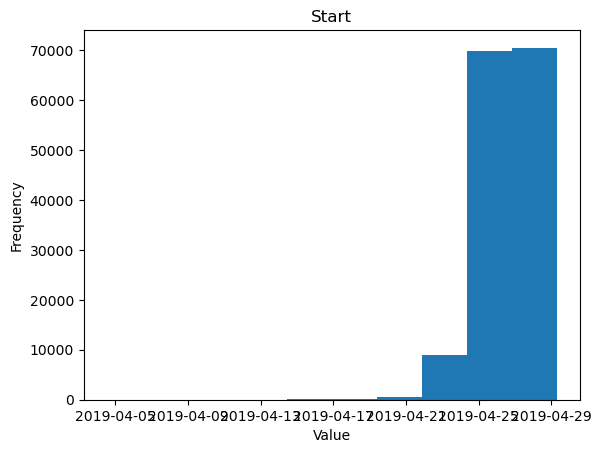

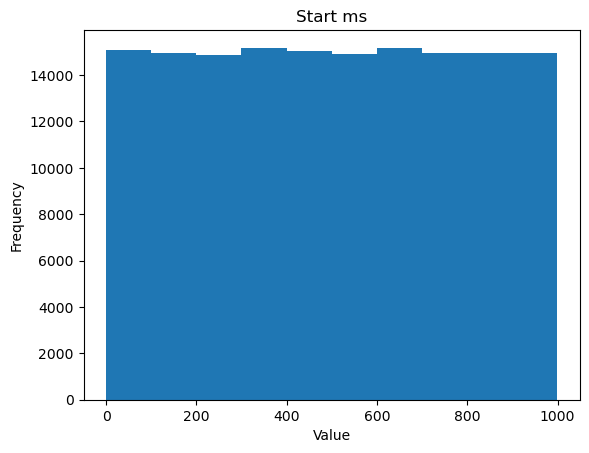

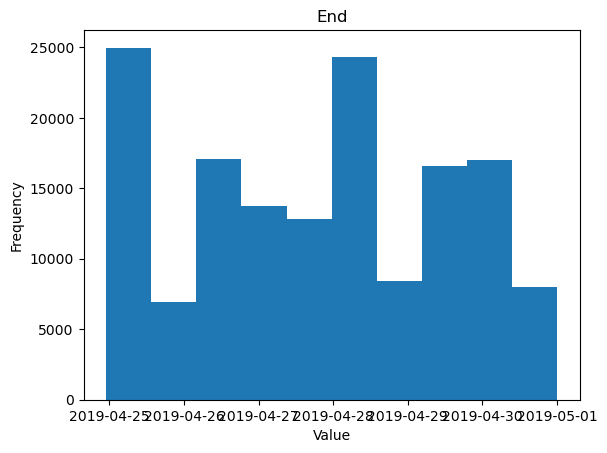

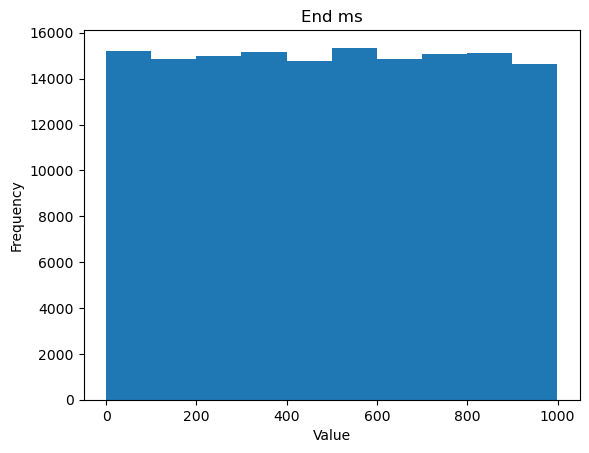

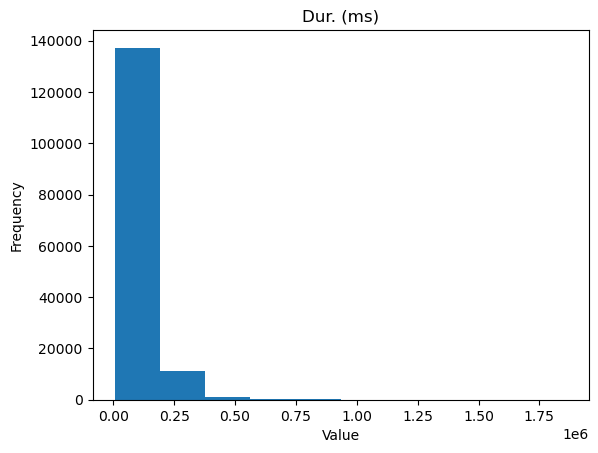

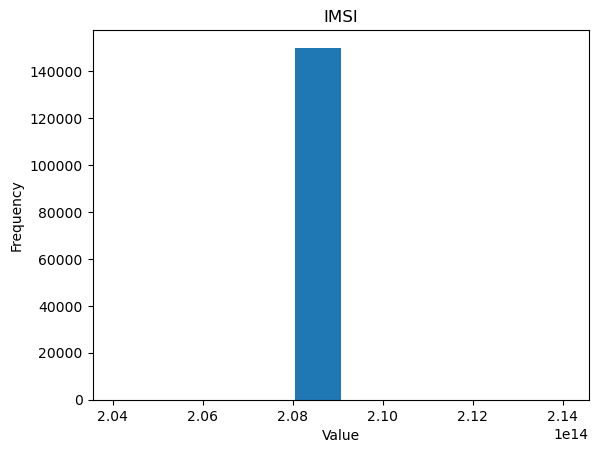

FileNotFoundError: [Errno 2] No such file or directory: 'MSISDN/Number_histogram.png'

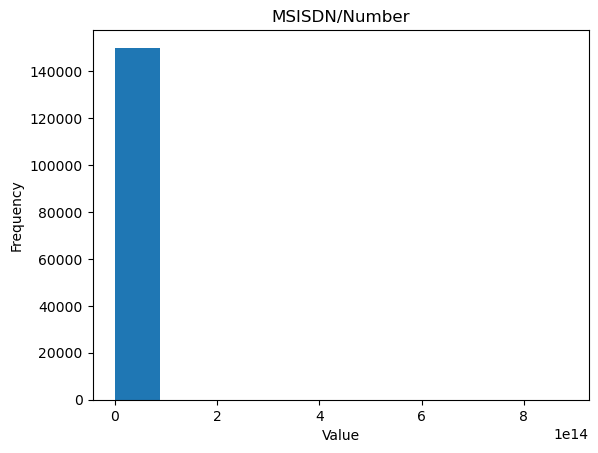

In [27]:
for col in non_categorical_columns:
    
    plt.hist(df1[col], bins=10)
    plt.title(col)
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.savefig(f"{col}_histogram.png") 
    plt.show()

### Task 1.2.5 - Bivariate Analysis – explore the relationship between each application & the total DL+UL data using appropriate methods and interpret your findings

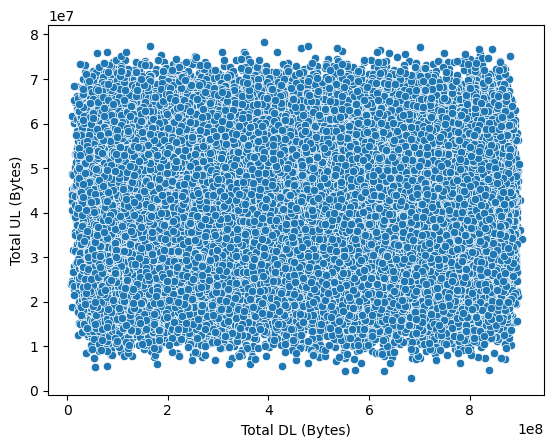

<Figure size 640x480 with 0 Axes>

In [28]:
sns.scatterplot(x='Total DL (Bytes)',y='Total UL (Bytes)',data=df1)

plt.show()
plt.savefig('scatter1.png')

### Task 1.2.6 - Variable transformations – segment the users into the top five decile classes based on the total duration for all sessions and compute the total data (DL+UL) per decile class

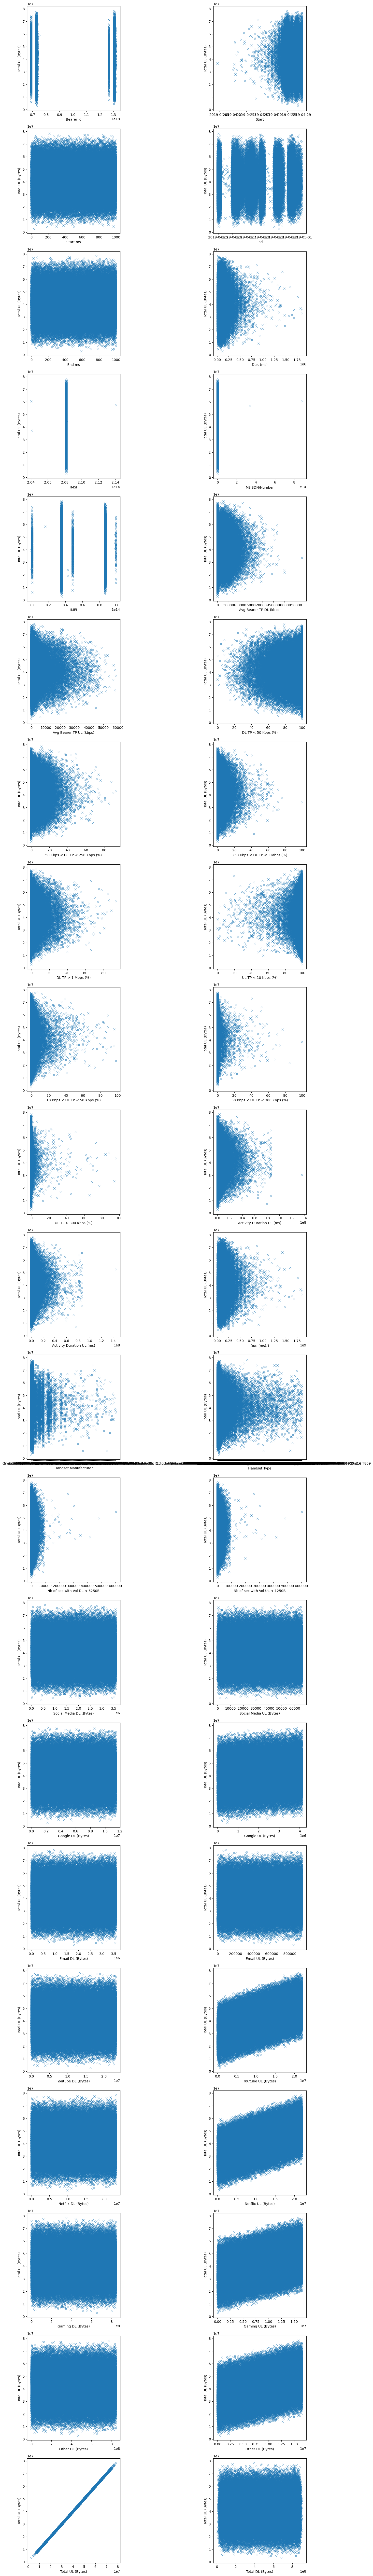

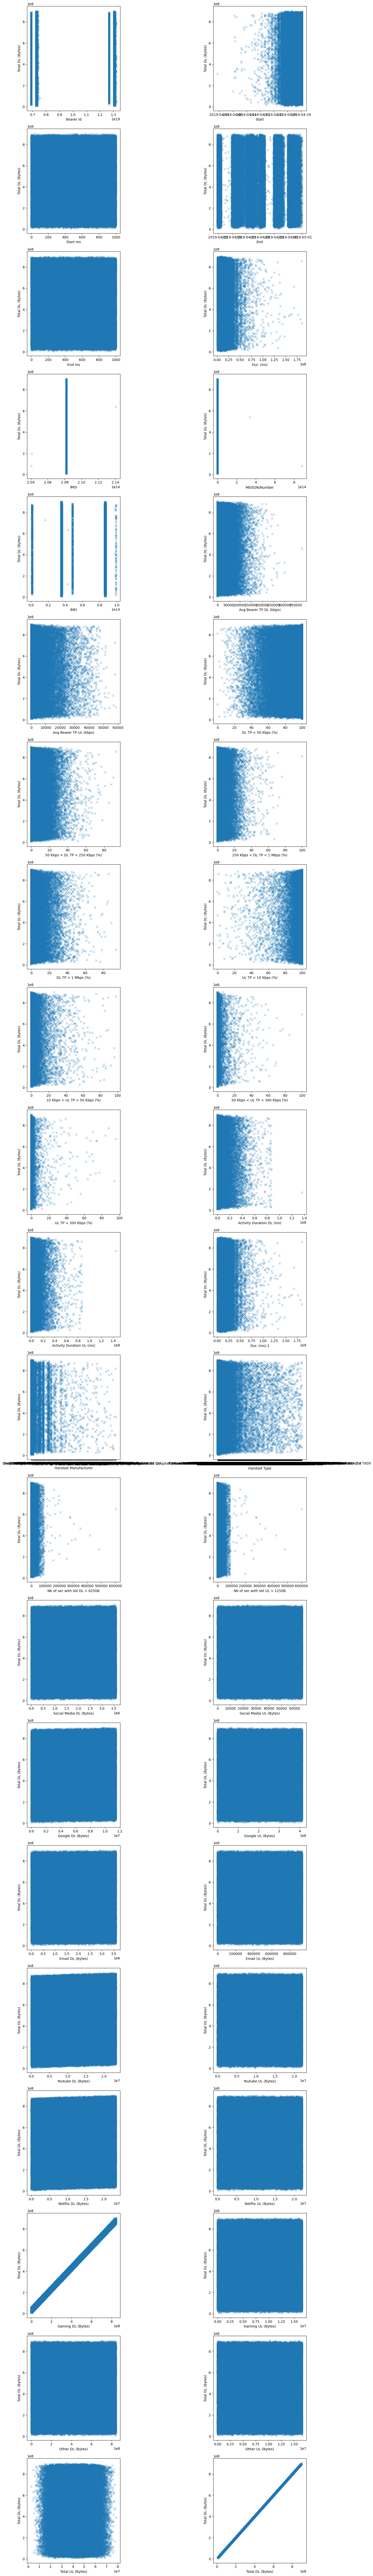

In [29]:
num_cols = 2
num_rows = (len(df1.columns) - 1) // num_cols + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

for i, column in enumerate(df1.columns):
    row = i // num_cols
    col = i % num_cols
    
    sns.scatterplot(data=df1, x=column, y="Total UL (Bytes)", ax=axes[row, col], marker="x")
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel("Total UL (Bytes)")
    
plt.tight_layout()
plt.savefig('scatter_plots_ul.png')
plt.show()

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

for i, column in enumerate(df1.columns):
    row = i // num_cols
    col = i % num_cols
    
    sns.scatterplot(data=df1, x=column, y="Total DL (Bytes)", ax=axes[row, col], marker="x")
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel("Total DL (Bytes)")
    
plt.tight_layout()
plt.savefig('scatter_plots_dl.png')
plt.show()

### Task 1.2.7 - Correlation Analysis – compute a correlation matrix for the following variables and interpret your findings: Social Media data, Google data, Email data, Youtube data, Netflix data, Gaming data, and Other data 

In [30]:
df2={"Social Media DL (Bytes)":df1["Social Media DL (Bytes)"],
   "YouTube DL (Bytes)":df1["Youtube DL (Bytes)"],
   "Netflix DL (Bytes)":df1["Netflix DL (Bytes)"],
   "Google DL (Bytes)":df1["Google DL (Bytes)"],
   "Email DL (Bytes)":df1["Email DL (Bytes)"],
   "Gaming DL (Bytes)":df1["Gaming DL (Bytes)"],
   "Other DL (Bytes)":df1["Other UL (Bytes)"],
  "total_DL_vol(bytes)":df1['Total DL (Bytes)']}

In [31]:
df3=pd.DataFrame(df2)

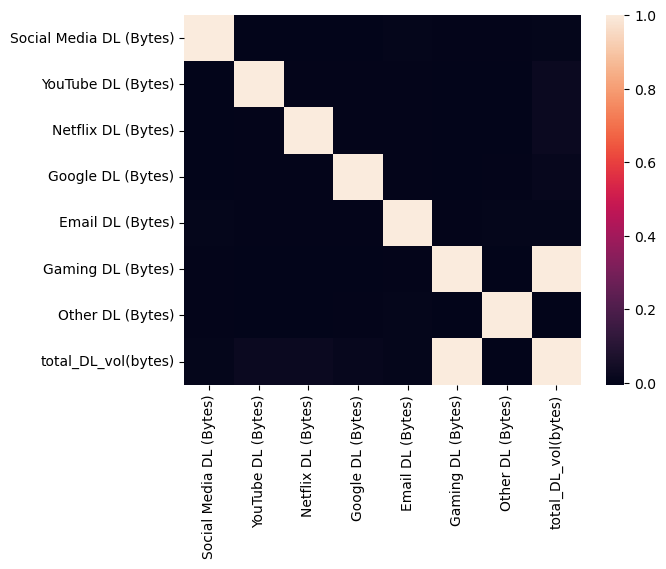

In [32]:
# To visualize the correlation between the features
sns.heatmap(df3.corr())

plt.savefig('heatplot1.png')
plt.show()